# Hypothesis Testing

## Imports

In [133]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import pickle
from tqdm import tqdm

In [132]:
dirData = "Data/Cities_Labelled/"

## Creating Master Data

In [6]:
data = []
for city in os.listdir(dirData):
    fname = os.path.join(dirData, city)
    if os.path.isfile(fname):
        df = pd.read_csv(fname)
        data.extend(df.values.tolist())

df = pd.DataFrame(data, columns=("Review","Sentiment", "Score"))
df.to_csv(f"{dirData}MasterData.csv", index=False)


In [147]:
data = []
na = ["chicago.csv", "las-vegas.csv", "new-york-city.csv", "san-francisco.csv", "montreal.csv"]
asia = ["shanghai.csv", "dubai.csv", "beijing.csv", "new-delhi.csv"]
eur = ["london.csv"]

for city in os.listdir(dirData):
    fname = os.path.join(dirData, city)
    if os.path.isfile(fname):
        df = pd.read_csv(fname)
        if city in na:
            df['Continent'] = "na"
        elif city in asia:
            df['Continent'] = "asia"
        else:
            df['Continent'] = "europe"
        data.extend(df.values.tolist())

df = pd.DataFrame(data, columns=("Review","Sentiment", "Score", "Continent"))
df.to_csv(f"{dirData}MasterCont.csv", index=False)


In [140]:
df = pd.read_csv(f"{dirData}MasterData.csv")
df.head()

,Review,Sentiment,Score
0,nice trendy hotel location not bad I stay hote...,POSITIVE,0.998912
1,great budget hotel stay two night aloft recent...,POSITIVE,0.998913
2,excellent value location not big problem stay ...,POSITIVE,0.998927
3,stylish clean reasonable value poor location I...,NEGATIVE,0.000690
4,remote excellent value money stay one night ho...,POSITIVE,0.998909


Max length: 1992, Min length: 1, Average Length :  92.82041210711957


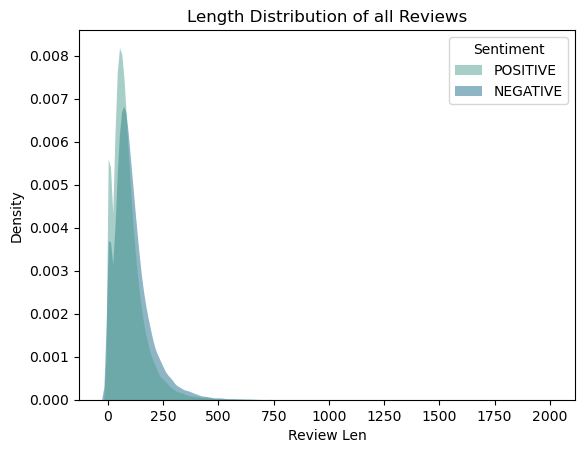

In [12]:
df['Review Len']= df['Review'].str.split().map(lambda x: len(x))
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(df['Review Len']),min(df['Review Len']),df['Review Len'].mean()))
sns.kdeplot(data=df, x="Review Len", hue="Sentiment",fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
plt.title('Length Distribution of all Reviews')
# plt.savefig("Plots/Review Length Distribution.png")
plt.show()

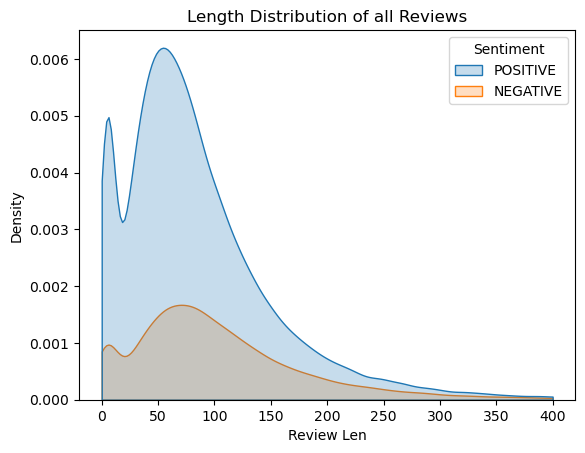

In [66]:
sns.kdeplot(data=df, x="Review Len", hue="Sentiment", clip=(0,400), fill=True)
plt.title('Length Distribution of all Reviews')
# plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.savefig("Plots/Review Length Distribution.png")
plt.show()

In [141]:
df['Review Len']= df['Review'].str.split().map(lambda x: len(x))
dfpos = df[df['Sentiment'] == 'POSITIVE']
dfneg = df[df['Sentiment'] == 'NEGATIVE']

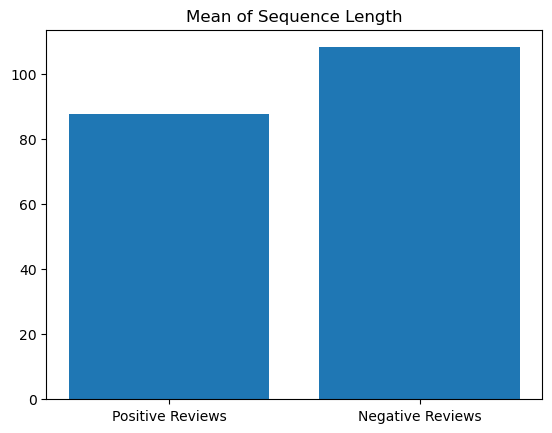

In [142]:
plt.bar(height=[ dfpos['Review Len'].mean(), dfneg['Review Len'].mean()], x=["Positive Reviews", "Negative Reviews"], label=["Positive Reviews", "Negative Reviews"])
plt.title('Mean of Sequence Length')
# plt.legend(bbox_to_anchor=(1,1), loc=2)
# plt.savefig("Plots/Mean of Sequence Length.png")
plt.show()

## Test 1:

Null Hypothesis (H0): Negative Reviews are longer than positive reviews (Sequence length of +ve reviews < Sequence length of -ve reviews).  
Alternate Hypothesis (H1): Positive Reviews are longer or equal in length than negative reviews (Sequence length of +ve reviews > Sequence length of -ve reviews).  


In [37]:
meanPos = dfpos['Review Len'].mean()
meanNeg = dfneg['Review Len'].mean()
varPos = dfpos['Review Len'].var()
varNeg = dfneg['Review Len'].var()
dataPos = dfpos['Review Len'].to_numpy()
dataNeg = dfneg['Review Len'].to_numpy()

In [41]:
nNeg = 100
z_test = []
for i in range(3):
    sampNeg = np.random.choice(dataNeg, size=nNeg, replace=False)
    sampPos = np.random.choice(dataPos, size=nNeg*3, replace=False)
    z = ((sampPos.mean() - sampNeg.mean())-(meanPos - meanNeg))/np.sqrt((varNeg/nNeg) + (varPos/(3*nNeg)))
    z_test.append(z)
    nNeg *= 10

In [47]:
nNeg = [100,500,1000,5000,10000,50000]
z_test = []
for i in nNeg:
    sampNeg = np.random.choice(dataNeg, size=i, replace=False)
    sampPos = np.random.choice(dataPos, size=i, replace=False)
    z = ((sampPos.mean() - sampNeg.mean())-(meanPos - meanNeg))/np.sqrt((varNeg/i) + (varPos/i))
    z_test.append(z)

In [44]:
sampNeg.mean()

108.1139

In [45]:
sampPos.mean()

87.59333333333333

In [42]:
# sample = 100,1000,10000
z_test

[-0.725984038172399, 1.4467178904027436, -0.109604968351103]

In [48]:
z_test

[-0.2566760816222708,
 1.1224672121822574,
 -0.9968654412911254,
 0.1737122585015533,
 1.1134795560062634,
 -0.9788470535685424]

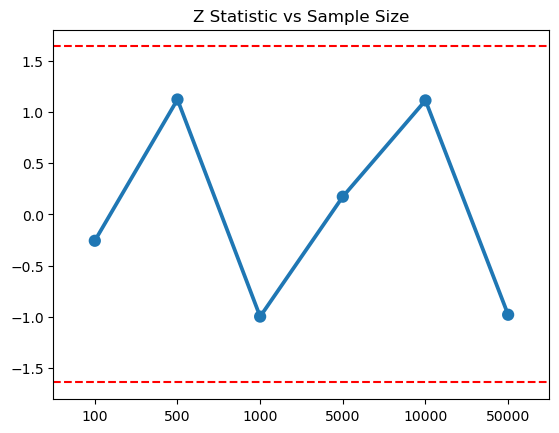

In [75]:
sns.pointplot(y=z_test, x = nNeg)
plt.axhline(y = 1.64, color ="red", linestyle ="--") 
plt.axhline(y = -1.64, color ="red", linestyle ="--") 
plt.title('Z Statistic vs Sample Size')
# plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.savefig("Plots/Test1-ZStat.png")
plt.show()

## Test 2:

Null Hypothesis (H0): Beijing (Capital City) has same proportion of positive reviews as Shanghai.    
Alternate Hypothesis (H1): Beijing does not have the same proportion of positive reviews as Shanghai.


In [183]:
df1 = pd.read_csv(f"{dirData}beijing.csv")

In [77]:
df1.head()

,Review,Sentiment,Score
0,nice trendy hotel location not bad I stay hote...,POSITIVE,0.998912
1,great budget hotel stay two night aloft recent...,POSITIVE,0.998913
2,excellent value location not big problem stay ...,POSITIVE,0.998927
3,stylish clean reasonable value poor location I...,NEGATIVE,0.000690
4,remote excellent value money stay one night ho...,POSITIVE,0.998909


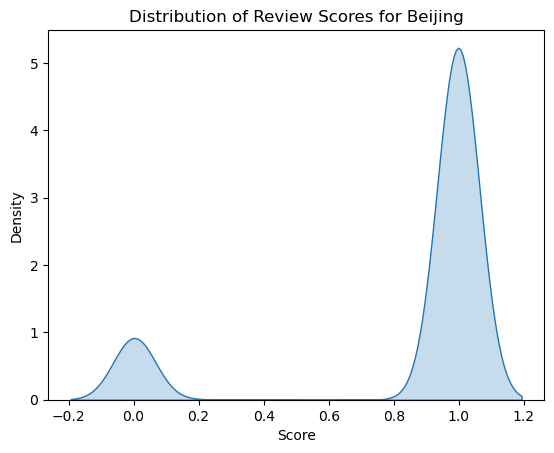

In [184]:
sns.kdeplot(data=df1, x="Score", fill=True)
plt.title('Distribution of Review Scores for Beijing')
# plt.legend(bbox_to_anchor=(1,1), loc=2)
# plt.savefig("Plots/Review Length Distribution.png")
plt.show()

In [185]:
df2 = pd.read_csv(f"{dirData}shanghai.csv")

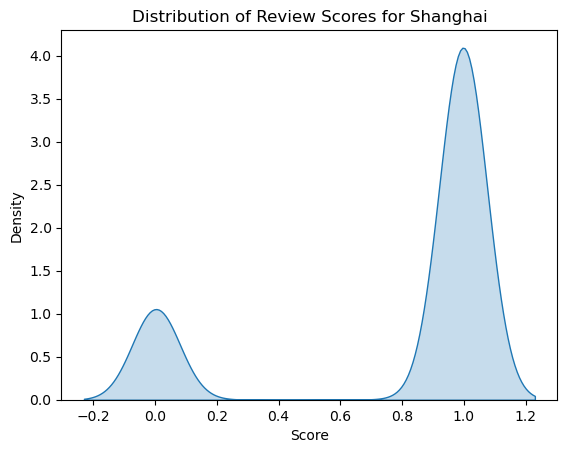

In [186]:
sns.kdeplot(data=df2, x="Score", fill=True)
plt.title('Distribution of Review Scores for Shanghai')
# plt.legend(bbox_to_anchor=(1,1), loc=2)
# plt.savefig("Plots/Review Length Distribution.png")
plt.show()

In [128]:
datab = df1['Sentiment'].to_numpy()
datas = df2['Sentiment'].to_numpy()

In [180]:
samples = [100,300,500,800,1000]
plotdata = []
Z_stat = []
runs = 10
for r in range(runs):
    for samp in samples:
        sampb = np.random.choice(datab, size=samp, replace=False)
        samps = np.random.choice(datas, size=samp, replace=False)
        p1 = 0
        p2 = 0
        for i in range(samp):
            if sampb[i] == 'POSITIVE':
                p2 += 1
            if samps[i] == 'POSITIVE':
                p1 += 1
        p1 = p1/samp
        p2 = p2/samp
        P = ((p1 * samp) + (p2 * samp))/(2*samp)
        Z = (p1-p2)/np.sqrt(P*(1-P)*(2/samp))
        arb = [samp, f"run {r+1}", Z]
        plotdata.append(arb)


In [181]:
pltdat = pd.DataFrame(plotdata, columns=("Sample", "Run", "Z value"))

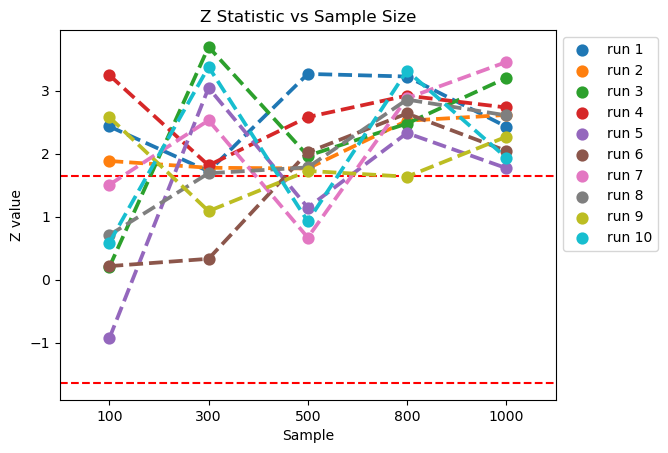

In [182]:
sns.pointplot(data=pltdat, x="Sample", y="Z value", hue="Run", linestyles="--")
plt.axhline(y = 1.64, color ="red", linestyle ="--") 
plt.axhline(y = -1.64, color ="red", linestyle ="--") 
plt.title('Z Statistic vs Sample Size')
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.savefig("Plots/Test2-ZStat.png")
plt.show()

In [145]:
plt.bar(height=[ dfpos['Review Len'].mean(), dfneg['Review Len'].mean()], x=["Positive Reviews", "Negative Reviews"], label=["Positive Reviews", "Negative Reviews"])
plt.title('Mean of Sequence Length')
# plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.savefig("Plots/Mean of Sequence Length.png")
plt.show()

[2.576735608413086, 2.2735165145035166, 1.632209889049084, 2.224599287084935, 4.297693935857431]


In [134]:
beij_prop = df1[df1['Sentiment'] == 'POSITIVE'].shape[0]/df1.shape[0]
shang_prop = df2[df2['Sentiment'] == 'POSITIVE'].shape[0]/df2.shape[0]

In [159]:
print(beij_prop, shang_prop)

0.8490977592702756 0.7948316366483946


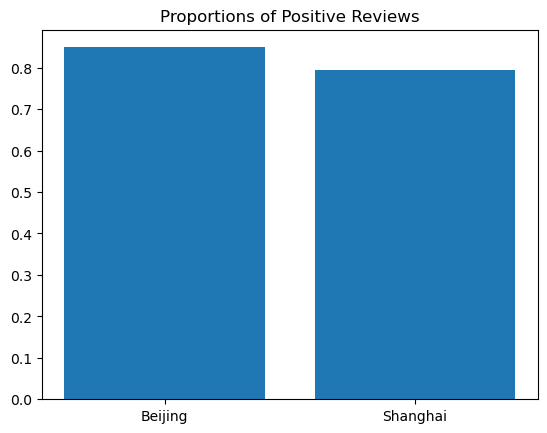

In [160]:
plt.bar(height=[beij_prop, shang_prop], x=["Beijing", "Shanghai"], label=["Beijing", "Shanghai"])
plt.title('Proportions of Positive Reviews')
# plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.savefig("Plots/Test-2 Positive Review Props.png")
plt.show()

## Test 3


In [148]:
df = pd.read_csv(f"{dirData}MasterCont.csv")

                                              Review Sentiment     Score  \
0  nice trendy hotel location not bad I stay hote...  POSITIVE  0.998912   
1  great budget hotel stay two night aloft recent...  POSITIVE  0.998913   
2  excellent value location not big problem stay ...  POSITIVE  0.998927   
3  stylish clean reasonable value poor location I...  NEGATIVE  0.000690   
4  remote excellent value money stay one night ho...  POSITIVE  0.998909   

  Continent  
0      asia  
1      asia  
2      asia  
3      asia  
4      asia  


In [149]:
df.head()

,Review,Sentiment,Score,Continent
0,nice trendy hotel location not bad I stay hote...,POSITIVE,0.998912,asia
1,great budget hotel stay two night aloft recent...,POSITIVE,0.998913,asia
2,excellent value location not big problem stay ...,POSITIVE,0.998927,asia
3,stylish clean reasonable value poor location I...,NEGATIVE,0.000690,asia
4,remote excellent value money stay one night ho...,POSITIVE,0.998909,asia


In [150]:
data = df.to_numpy()

In [151]:
data[0]

array(['nice trendy hotel location not bad I stay hotel one night fairly new place taxi driver not know andor not want drive I eventually arrive hotel I pleasantly surprised decor lobby ground floor area stylish modern I find reception staff geete I aloha bit place I guess brief say keep coroporate image I starwood preferred guest member I give small gift upon check couple fridge magnet gift box nevertheless nice gesture room nice roomy tea coffee facility room get two complimentary bottle water plus toiletry bliss location not great last metro stop need take taxi not plan go see historic site beijing ok I choose breakfast hotel really tasty good selection dish couple computer use communal area well pool table also small swimming pool gym area I would definitely stay hotel I not plan travel central beijing take long time location ok plan lot shopping big shopping centre minute away hotel plenty eat option around include restaurant serve dog meat',
       'POSITIVE', 0.9989123344421388,

In [173]:
chi = []
for i in range(100):
    ind = np.random.choice(np.arange(data.shape[0]), size=500, replace=False)
    continents = {'asia': {'exp':{'pos':0, 'neg':0, 'total':0}, 'obs':{'pos':0, 'neg':0, 'total':0}},
                'europe':{'exp':{'pos':0, 'neg':0, 'total':0}, 'obs':{'pos':0, 'neg':0, 'total':0}},
                'na':{'exp':{'pos':0, 'neg':0, 'total':0}, 'obs':{'pos':0, 'neg':0, 'total':0}}
                }
    for review in data[ind]:
        continents[review[3]]['obs']['total'] += 1
        if review[1] == 'POSITIVE':
            continents[review[3]]['obs']['pos'] += 1
        else:
            continents[review[3]]['obs']['neg'] += 1

    total = {"pos": 0, "neg": 0, 'total': ind.shape[0]}
    for review in data[ind]:
        if review[1] == 'POSITIVE':
            total['pos'] +=1
        else:
            total['neg'] +=1

    for cont in continents:
        continents[cont]['exp']['pos'] = (total['pos']/total['total']) * (continents[cont]['obs']['total']/total['total']) * total['total']
        continents[cont]['exp']['neg'] = (total['neg']/total['total']) * (continents[cont]['obs']['total']/total['total']) * total['total']
        continents[cont]['exp']['total'] = continents[cont]['exp']['pos'] + continents[cont]['exp']['neg']

    chi_sq = 0
    for cont in continents:
        ch = 0
        for cl in ["pos", "neg"]:
            ch += (((continents[cont]['obs'][cl] - continents[cont]['exp'][cl]) * (continents[cont]['obs'][cl] - continents[cont]['exp'][cl]))/continents[cont]['exp'][cl])
            chi_sq += (((continents[cont]['obs'][cl] - continents[cont]['exp'][cl]) * (continents[cont]['obs'][cl] - continents[cont]['exp'][cl]))/continents[cont]['exp'][cl])
        # print(ch)

    # print(f"Chi Square Test Value: {chi_sq}")
    chi.append(chi_sq)

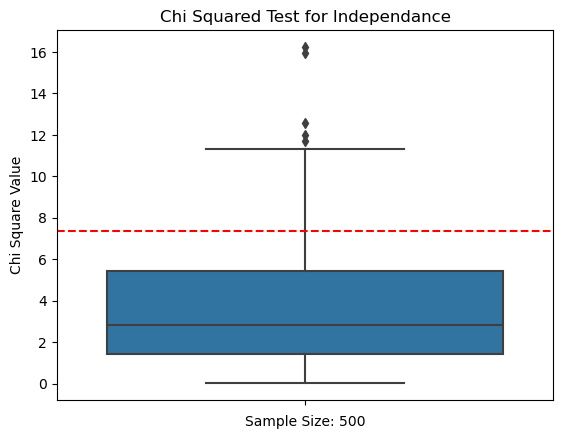

In [174]:
sns.boxplot(y=chi).set_title("Chi Squared Test for Independance")
plt.ylabel("Chi Square Value")
plt.xlabel("Sample Size: 500")
plt.axhline(y = 7.38, color ="red", linestyle ="--") 
plt.show()

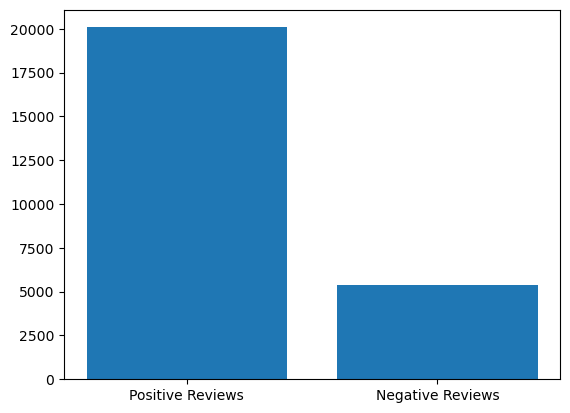

In [97]:
plt.bar(height=[asia['obs']['pos'], asia['obs']['neg']], x=["Positive Reviews", "Negative Reviews"], label=["Positive Reviews", "Negative Reviews"])
# plt.title('Mean of Sequence Length')
# plt.legend(bbox_to_anchor=(1,1), loc=2)
# plt.savefig("Plots/Mean of Sequence Length.png")
plt.show()

In [190]:
asiaprop = asia['obs']['pos']/asia['obs']['total']

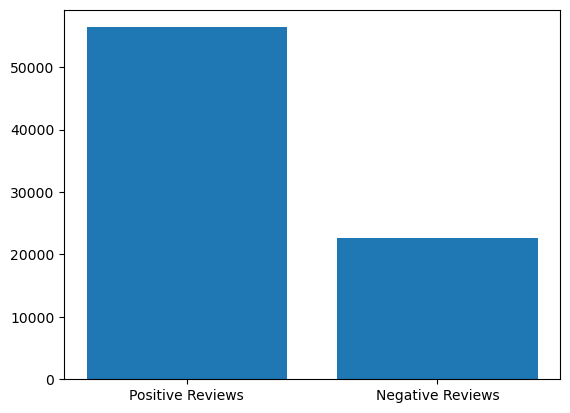

In [98]:
plt.bar(height=[europe['obs']['pos'], europe['obs']['neg']], x=["Positive Reviews", "Negative Reviews"], label=["Positive Reviews", "Negative Reviews"])
# plt.title('Mean of Sequence Length')
# plt.legend(bbox_to_anchor=(1,1), loc=2)
# plt.savefig("Plots/Mean of Sequence Length.png")
plt.show()

In [191]:
eurprop=europe['obs']['pos']/europe['obs']['total']

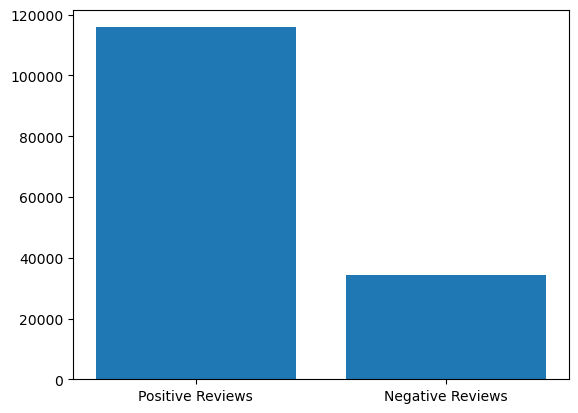

In [99]:
plt.bar(height=[north_am['obs']['pos'], north_am['obs']['neg']], x=["Positive Reviews", "Negative Reviews"], label=["Positive Reviews", "Negative Reviews"])
# plt.title('Mean of Sequence Length')
# plt.legend(bbox_to_anchor=(1,1), loc=2)
# plt.savefig("Plots/Mean of Sequence Length.png")
plt.show()

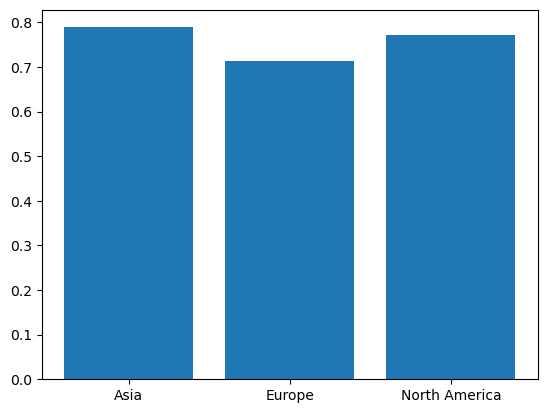

In [193]:
conts = ["Asia", "Europe", "North America"]
plt.bar(height=[asiaprop, eurprop, na], x=conts, label=conts)
# plt.title('Mean of Sequence Length')
# plt.legend(bbox_to_anchor=(1,1), loc=2)
# plt.savefig("Plots/Mean of Sequence Length.png")
plt.show()

## Test 4 & 5

In [29]:
def t_test(data1, data2, n):
    ind = np.random.choice(np.arange(data1.shape[0]), size=n, replace=False)
    p1 = data1[ind]
    p2 = data2[ind]
    d = p1 - p2
    dbar = d.mean()
    var = np.matmul((d-dbar).T, d-dbar)
    var = var/(n-1)
    p1bar = p1.mean()
    p2bar = p2.mean()
    t = (p1bar - p2bar)/np.sqrt(var/n)
    return t

In [23]:
def labelEncode(vec):
    data = []
    for label in vec:
        if label == 'POSITIVE':
            data.append(1)
        else:
            data.append(0)
    data = np.array(data, dtype=int)
    return data

In [13]:
preds_Rob = []
with open("ML Models Preds/preds_Rob", "rb") as f:
    preds_Rob = pickle.load(f)

In [16]:
preds_SVM = []
with open("ML Models Preds/preds_SVMT", "rb") as f:
    preds_SVM = pickle.load(f)
    assert len(preds_Rob) == len(preds_SVM)

In [21]:
preds_RF = []
with open("ML Models Preds/preds_RF", "rb") as f:
    preds_RF = pickle.load(f)
    assert len(preds_Rob) == len(preds_RF)

In [31]:
preds_Rob = np.array(preds_Rob, dtype=int)

In [24]:
preds_RF = labelEncode(preds_RF)
preds_SVM = labelEncode(preds_SVM)

In [32]:
assert len(preds_SVM) == len(preds_RF) and len(preds_RF) == len(preds_Rob)

In [104]:
# 500,200, 100 ~ 1.98
t = []
for i in range(100):
    t.append(t_test(preds_RF, preds_Rob, 501))

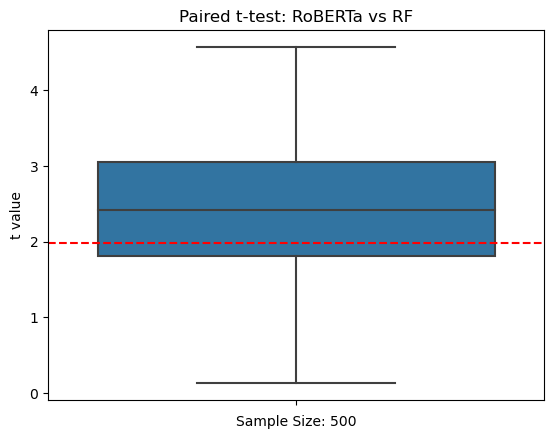

In [108]:
sns.boxplot(y=t).set_title("Paired t-test: RoBERTa vs RF")
plt.ylabel("t value")
plt.xlabel("Sample Size: 500")
plt.axhline(y = 1.98, color ="red", linestyle ="--") 
plt.show()

In [130]:
# 500,200, 100 ~ 1.98
t = []
for i in range(100):
    t.append(t_test(preds_SVM, preds_Rob, 501))

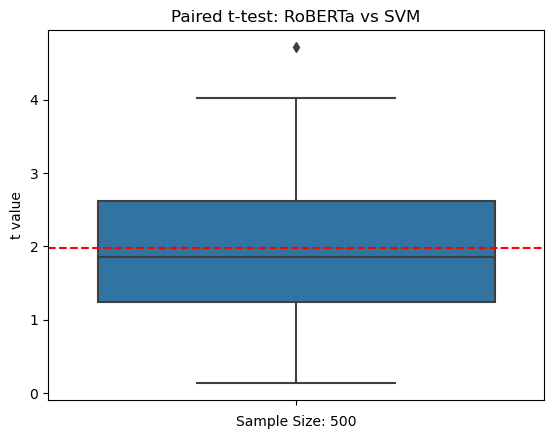

In [131]:
sns.boxplot(y=t).set_title("Paired t-test: RoBERTa vs SVM")
plt.ylabel("t value")
plt.xlabel("Sample Size: 500")
plt.axhline(y = 1.98, color ="red", linestyle ="--") 
plt.show()

In [34]:
print(t)

-2.4872086556120947


In [9]:
np.matmul((a-1).T, a-1)

30

## Misc

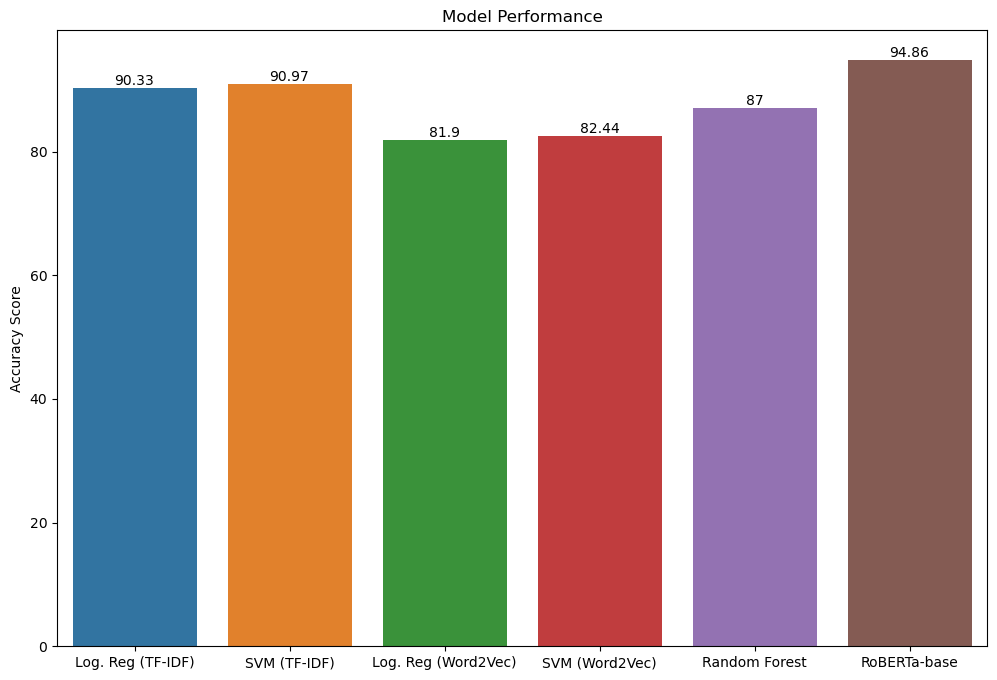

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12, 8))
datanames = ["Log. Reg (TF-IDF)", "SVM (TF-IDF)", "Log. Reg (Word2Vec)", "SVM (Word2Vec)", "Random Forest", "RoBERTa-base"]
accs = [90.33, 90.97, 81.90, 82.44, 87.0, 94.86]
ax = sns.barplot(x=datanames, y=accs)
ax.bar_label(ax.containers[0])
plt.ylabel("Accuracy Score")
plt.title("Model Performance")
plt.savefig("Plots/Model Performance.png")
plt.show()

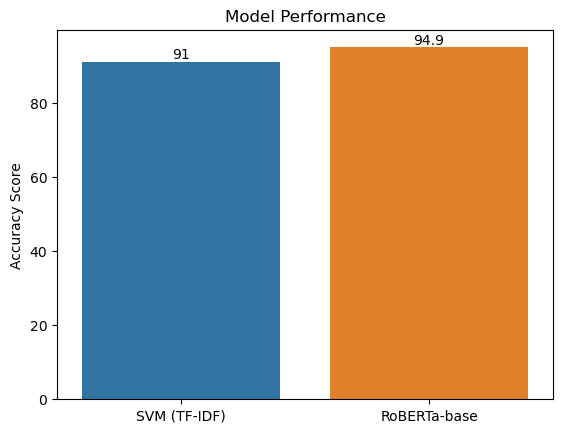

In [127]:
# from matplotlib.pyplot import figure
# figure(figsize=(8, 10), dpi=80)

datanames = ["SVM (TF-IDF)", "RoBERTa-base"]
accs = [91.0, 94.9]
ax = sns.barplot(x=datanames, y=accs)
ax.bar_label(ax.containers[0])
plt.ylabel("Accuracy Score")
plt.title("Model Performance")
# plt.savefig("Plots/Model Performance.png")
# plt.tight_layout()
plt.show()